# Week 9 Activity

1. Apply k-means clustering on 'zebra.jfif' to segment out the zebra.
- You are required to determine the optimal k by plotting the within cluster sum of squares vs number of clusters (2-10).
- Apply the clustering method on 3 color spaces: BGR, HSV and LAB. Compare the results obtained.

In [16]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from util_func import *

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

In [8]:
# apply k-means clustering on image
def k_means_clust(img, K, max_iter=10, eps=1.0, attempts=10, flag=cv.KMEANS_PP_CENTERS):
    """Args:
    img: 3-channel color image
    K: user defined number of cluster
    by default, max_iter=10, eps=1, attempts=10, k-means++"""
    
    # reshape and cast
    img = img.reshape((-1, 3))
    img = np.float32(img)
    criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_MAX_ITER, max_iter, eps)
    
    return cv.kmeans(img, K, None, criteria, attempts, flag)

In [32]:
# Function to calculate WCSS
def calculate_wcss_bgr(data, labels, centers):
    wcss = 0
    for i in range(len(data)):
        cluster_center = centers[labels[i]]
        wcss += np.sum((data[i] - cluster_center)**2)
    return wcss

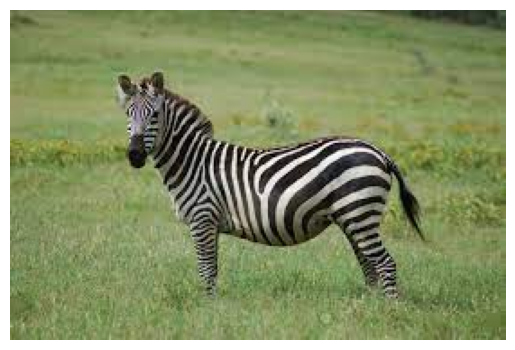

In [9]:
img = cv.imread('images/zebra.jfif')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure()
plt.axis("off")
plt.imshow(img_rgb)

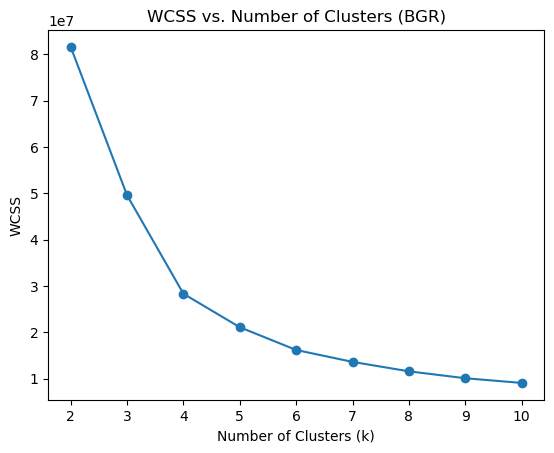

In [33]:
# Range of k values to consider
k_values = range(2, 11)

# List to store WCSS values for each k
wcss_values_bgr = []

# Convert image to a flat list of BGR values
img_bgr = img.reshape((-1, 3))

# Calculate WCSS for each k value
for k in k_values:
    ret, label, center = k_means_clust(img_bgr, k)
    wcss_bgr = calculate_wcss_bgr(img_bgr, label, center)
    wcss_values_bgr.append(wcss_bgr)

# Plot WCSS vs. Number of Clusters
plt.plot(k_values, wcss_values_bgr, marker='o')
plt.title('WCSS vs. Number of Clusters (BGR)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

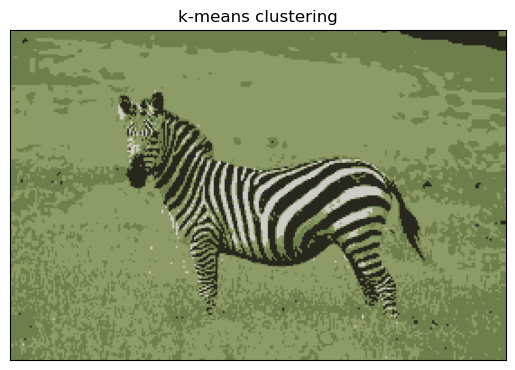

In [44]:
# call the function
ret, label, center = k_means_clust(img, 4)
center = np.uint8(center)
res = center[label.ravel()]
quant = res.reshape(img.shape)

quant_rgb = cv.cvtColor(quant, cv.COLOR_BGR2RGB)

plt_img(quant_rgb, "k-means clustering")

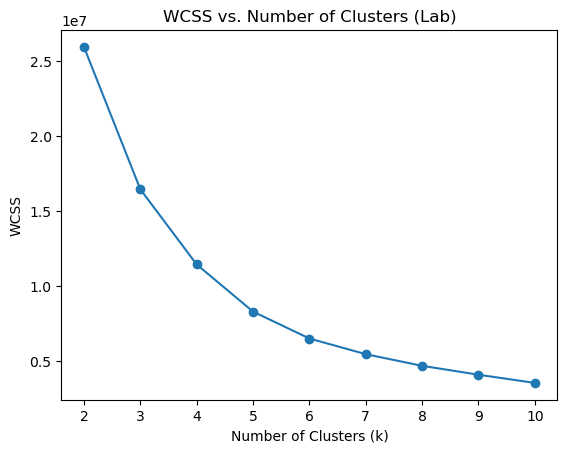

In [40]:
img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)

# Range of k values to consider
k_values = range(2, 11)

# List to store WCSS values for each k
wcss_values_lab = []

# Convert image to a flat list of BGR values
img_lab1 = img_lab.reshape((-1, 3))

# Calculate WCSS for each k value
for k in k_values:
    ret, label, center = k_means_clust(img_lab1, k)
    wcss_lab = calculate_wcss_bgr(img_lab1, label, center)
    wcss_values_lab.append(wcss_lab)

# Plot WCSS vs. Number of Clusters
plt.plot(k_values, wcss_values_lab, marker='o')
plt.title('WCSS vs. Number of Clusters (Lab)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

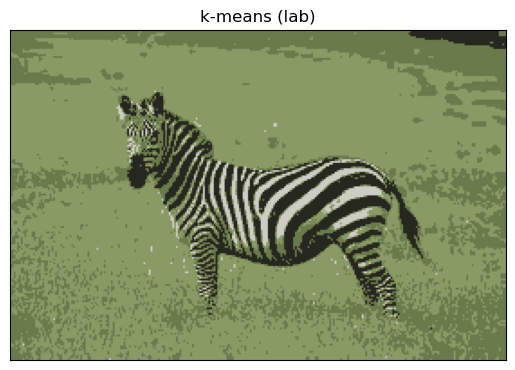

In [45]:
ret, label, center = k_means_clust(img_lab, 4)

center = np.uint8(center)
res = center[label.ravel()]
quant = res.reshape(img_lab.shape)

quant_rgb = cv.cvtColor(quant, cv.COLOR_Lab2RGB)

plt_img(quant_rgb, "k-means (lab)")

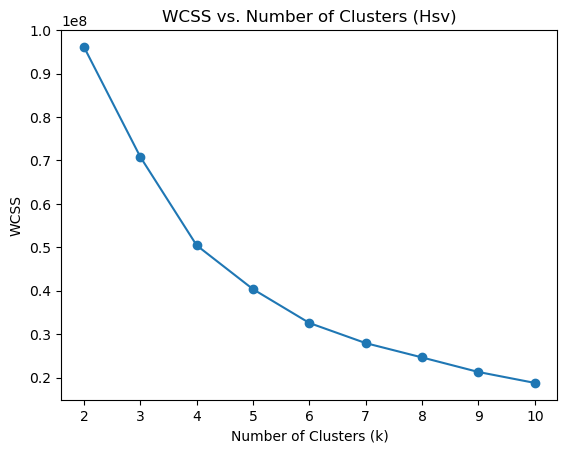

In [42]:
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Range of k values to consider
k_values = range(2, 11)

# List to store WCSS values for each k
wcss_values_hsv = []

# Convert image to a flat list of BGR values
img_hsv1 = img_hsv.reshape((-1, 3))

# Calculate WCSS for each k value
for k in k_values:
    ret, label, center = k_means_clust(img_hsv1, k)
    wcss_hsv = calculate_wcss_bgr(img_hsv1, label, center)
    wcss_values_hsv.append(wcss_hsv)

# Plot WCSS vs. Number of Clusters
plt.plot(k_values, wcss_values_hsv, marker='o')
plt.title('WCSS vs. Number of Clusters (Hsv)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

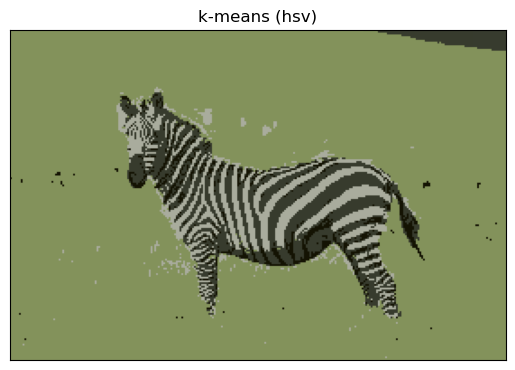

In [46]:
ret, label, center = k_means_clust(img_hsv, 4)

center = np.uint8(center)
res = center[label.ravel()]
quant = res.reshape(img_hsv.shape)

quant_rgb = cv.cvtColor(quant, cv.COLOR_HSV2RGB)

plt_img(quant_rgb, "k-means (hsv)")

# Answer:
- The optimal k is at k = 4, The difference of WCSS value decreases after 4.
- HSV has the best segmentation effect compared to BGR and LAB. HSV segment the zebra from its background while BGR and LAB do not completely segment out the background.